# Colour - HDRI - Examples: Vignette Characterisation & Correction

This example showcase various vignette characterisation and correction methods.


In [1]:
import colour
import colour_hdri
import numpy as np

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.9.12 (main, Mar 26 2022, 15:44:31)                         *
*                [Clang 13.1.6 (clang-1316.0.21.2)]                           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.1                                                        *
*       colour-hdri : v0.1.8-143-ged05917                                     *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.16.0                                                      *
*       matplotlib : 3.5.2                                                    *
*       numpy : 1.22.2                  

## Synthetic Data Generation

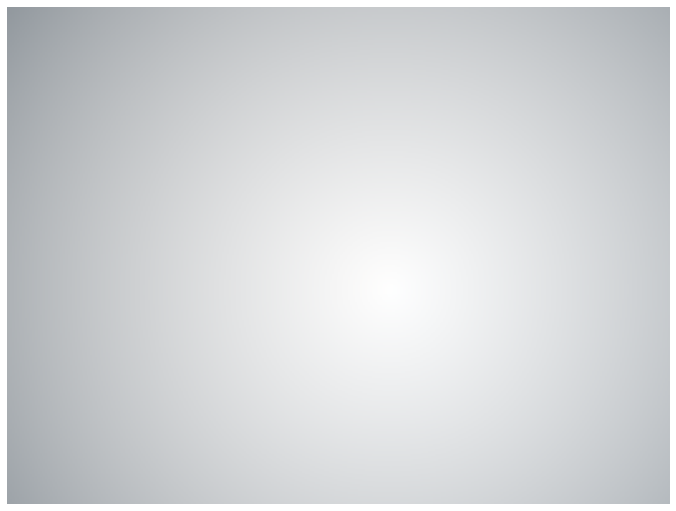

In [2]:
image = colour.utilities.ones([300, 400, 3])

image[..., 0] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 0], (2.0, 2.0), (0.450, 0.425)
)
image[..., 1] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 1], (2.1, 2.1), (0.450, 0.425)
)
image[..., 2] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 2], (2.2, 2.2), (0.450, 0.425)
)

colour.plotting.plot_image(colour.cctf_encoding(image));

## Vignette Characterisation

In [3]:
characterisation_data = colour_hdri.characterise_vignette(image)

print(characterisation_data.coefficients)
print(characterisation_data.center)

[[ -3.18593822e+00  -4.52216566e-02   9.00000000e-01  -2.11833944e+00
   -9.40869127e-02   9.00000000e-01]
 [ -2.98656606e+00  -2.15916859e-02   9.00000000e-01  -1.97648811e+00
   -7.61132064e-02   9.00000000e-01]
 [ -2.80540324e+00  -1.45395742e-04   9.00000000e-01  -1.84786218e+00
   -5.98185857e-02   9.00000000e-01]]
[ 0.56851406  0.57713855]


## Vignette Correction

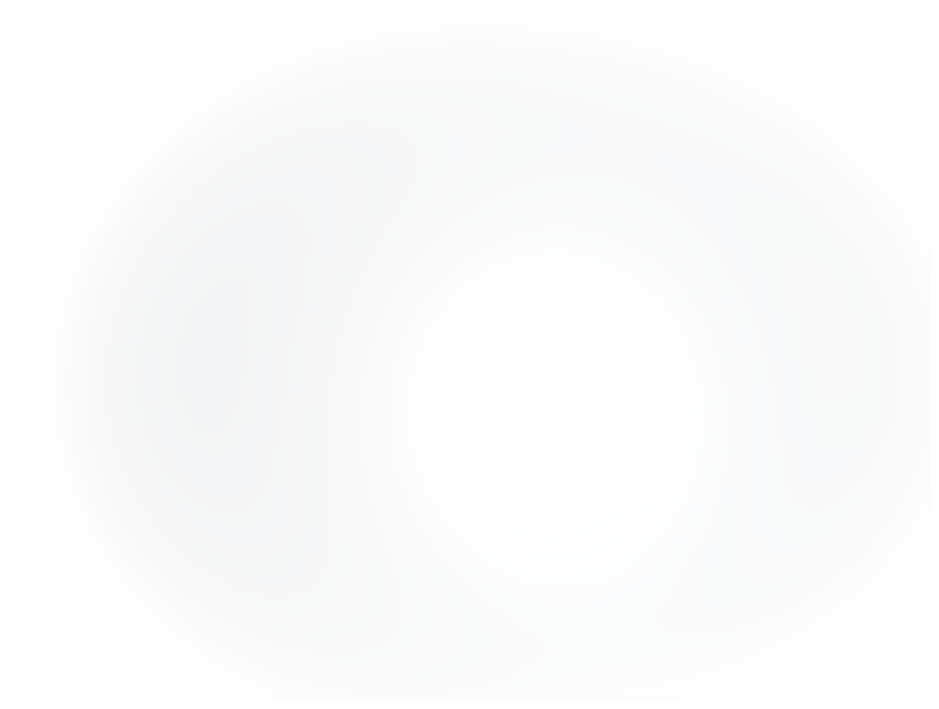

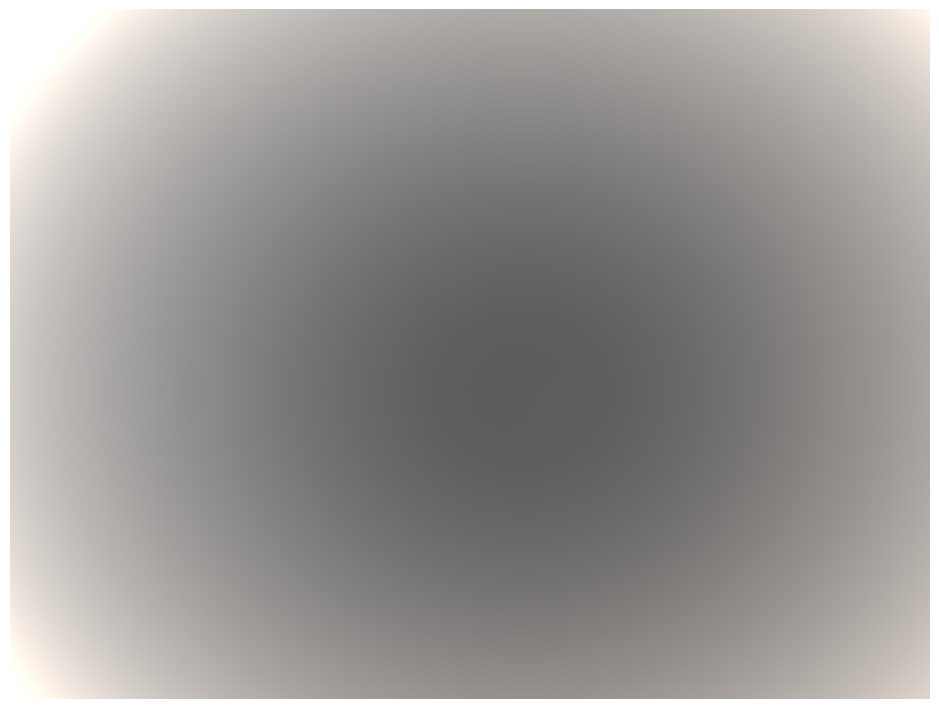

In [4]:
corrected = colour_hdri.correct_vignette(image, characterisation_data)

colour.plotting.plot_image(colour.cctf_encoding(corrected));

colour.plotting.plot_image(colour.cctf_encoding(np.abs(image - corrected)));